# Generate figures for the p63 MPRA paper
## Firgure 3. p63 motif classes and impact on activity.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import os
import textwrap
#define useful functions
def wrap_labels(ax, width, break_long_words=False, rotation = 0):
	labels = []
	for label in ax.get_xticklabels():
		text = label.get_text()
		labels.append(textwrap.fill(text, width=width,
					  break_long_words=break_long_words))
	ax.set_xticklabels(labels, rotation=rotation)
#generate statannotations-compatable list of comparisons (1 constant var)
def stats_comp(x_list, hue_list, constant):
	l=[]
	for cl in x_list:
		for ty in hue_list:
			l.append([(cl,constant),(cl,ty)])
	return l
#generate statannotations-compatable list of comparisons
def stats_comp_pair(x_list, hue_list):
	l=[]
	for x in x_list:
		l.append([(x,hue_list[0]),(x,hue_list[1])])
	return l
def patch_violinplot():
    """Patch seaborn's violinplot in current axis to workaround matplotlib's bug ##5423."""
    from matplotlib.collections import PolyCollection
    ax = plt.gca()
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_edgecolor('black')
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10},
			  font='arial')
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
fig_out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_WTp53KO_5variants.csv', index_col=0)
df= df[df.p63RE_class != 'septary'] #there's only 2 of them
#add column to shorten labels for p63RE class, adds math expression to allow superscript
change_p53 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$'}
change_p63 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$', 'tertiary':'$\mathregular{3^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$','senary':'$\mathregular{6^{o}}$'}
comb = {**change_p53,**change_p63}
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])
df.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,class_labels
131520,chr19_49338785_49338809,fullShuffle,MCF10A p53KO,0.915084,Unchanged,10,primary,-,Unique p63RE,59.166667,NaN,$\mathregular{1^{o}}$
16733,chr3_101602127_101602146,mut,MCF10A,1.290291,Unchanged,15,secondary,+,Unique p63RE,45.378151,NaN,$\mathregular{2^{o}}$
114337,chr2_220199204_220199223,flankShuffle,MCF10A p53KO,0.601548,Activating,13,secondary,+,Unique p63RE,48.739496,8.0,$\mathregular{2^{o}}$
108282,chr2_172843365_172843384,shuffle,MCF10A p53KO,0.688347,Activating,8,primary,-,p53RE+p63RE,44.537815,NaN,$\mathregular{1^{o}}$
69405,chr2_134131812_134131836,WT,MCF10A p53KO,0.602389,Repressing,18,primary,-,Unique p63RE,50.833333,NaN,$\mathregular{1^{o}}$


In [2]:
#Figure 3B-C. Need tables with MCF10A p63 ChIP-seq enrichemnt score
#CAREFUL HERE, not all enhancers have p53 or p63 enrichemnt in MCF10A ChIPseq dataseq
p63_chip = pd.read_csv(r'mcf10a_p53p63chromatin_enrichment_for_mpra.csv', usecols=['enhancer_variant', 'p63_log', 'p53_log','name', 'Cell.line'])
p63_chip.drop_duplicates(inplace=True)
p63_chip.rename(columns={'name':'loc', 'p63_log':'p63_enh_log2','p53_log':'p53_enh_log2'}, inplace=True)
p63_chip = p63_chip[(p63_chip.enhancer_variant == 'WT') & (p63_chip['Cell.line'] == 'MCF10A')]
p63_enrh = df[(df.cell_line == 'MCF10A') & (df.p63RE_type  == 'p53RE+p63RE') & (df.enhancer_variant == 'WT')].merge(p63_chip, how='left', on=['loc','enhancer_variant'])
p53_enr = p63_enrh[~p63_enrh.p53_enh_log2.isna()]
p63_enrh = p63_enrh[~p63_enrh.p63_enh_log2.isna()]
p63_enrh

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,class_labels,Cell.line,p63_enh_log2,p53_enh_log2
0,chr1_38117813_38117832,WT,MCF10A,1.681971,Activating,20,primary,+,p53RE+p63RE,57.983193,11.0,$\mathregular{1^{o}}$,MCF10A,12.909385,12.264083
1,chr1_40886808_40886827,WT,MCF10A,2.157630,Activating,20,primary,+,p53RE+p63RE,54.621849,16.0,$\mathregular{1^{o}}$,MCF10A,12.320982,12.454119
2,chr1_43582374_43582393,WT,MCF10A,0.908019,Unchanged,20,primary,+,p53RE+p63RE,57.142857,12.0,$\mathregular{1^{o}}$,MCF10A,12.631212,11.572807
3,chr1_59765194_59765213,WT,MCF10A,1.228130,Activating,20,primary,+,p53RE+p63RE,51.260504,NaN,$\mathregular{1^{o}}$,MCF10A,12.030278,10.626351
4,chr1_64263404_64263423,WT,MCF10A,0.626343,Unchanged,20,primary,+,p53RE+p63RE,50.420168,NaN,$\mathregular{1^{o}}$,MCF10A,12.295633,10.578955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,chr9_129030385_129030404,WT,MCF10A,0.554650,Unchanged,8,primary,+,p53RE+p63RE,47.899160,NaN,$\mathregular{1^{o}}$,MCF10A,10.442308,10.007843
6397,chr9_129383732_129383746,WT,MCF10A,0.534265,Unchanged,8,secondary,+,p53RE+p63RE,59.166667,NaN,$\mathregular{2^{o}}$,MCF10A,9.859553,10.279559
6398,chr9_131618240_131618259,WT,MCF10A,0.492341,Unchanged,8,primary,-,p53RE+p63RE,52.100840,NaN,$\mathregular{1^{o}}$,MCF10A,10.293590,10.349334
6399,chr9_131704288_131704302,WT,MCF10A,0.314781,Repressing,8,secondary,-,p53RE+p63RE,50.000000,NaN,$\mathregular{2^{o}}$,MCF10A,10.652126,10.092174


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.642e-07 U_stat=2.397e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.645e-01 U_stat=1.578e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:3.983e-03 U_stat=2.769e+05


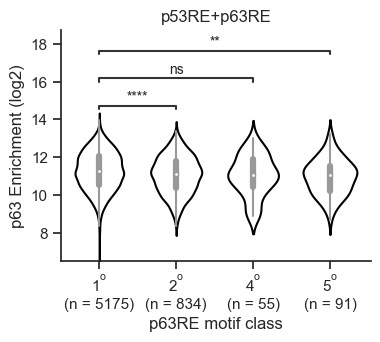

In [9]:
#Figure 3B
fig3B, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = p53_enr, x = 'class_labels',y = 'p63_enh_log2', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(
	ylim=(6.5, 16), title='p53RE+p63RE',ylabel = 'p63 Enrichment (log2)',xlabel='p63RE motif class')
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = p53_enr, x = 'class_labels',y = 'p63_enh_log2', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
patch_violinplot() #matplotlib bug fix
counts = p63_enrh.value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig3B.savefig(os.path.join(fig_out_path,'3B_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.268e-01 U_stat=2.229e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:7.573e-04 U_stat=1.798e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.440e-06 U_stat=3.032e+05


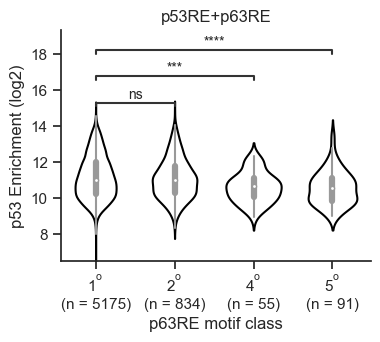

In [7]:
#Figure 3C
fig3C, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = p53_enr, x = 'class_labels',y = 'p53_enh_log2', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(
	ylim=(6.5, 16),ylabel = 'p53 Enrichment (log2)',xlabel='p63RE motif class', title='p53RE+p63RE')
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = p53_enr, x = 'class_labels',y = 'p53_enh_log2', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
patch_violinplot() #matplotlib bug fix
counts = p53_enr.value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig3C.savefig(os.path.join(fig_out_path,'3C_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:9.419e-39 Stat=8.918e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=1.515e+06
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.513e-01 Stat=7.330e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.602e-01 Stat=1.819e+03


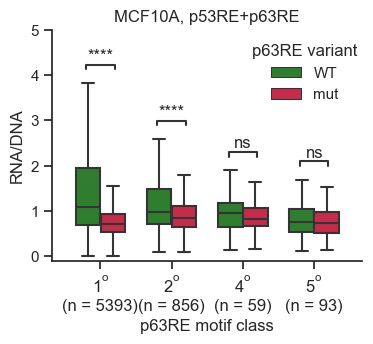

In [60]:
fig3D, ax = plt.subplots(figsize=(4,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p53.values(), ['WT','mut'])
df_both_mcf = df[(df.cell_line == 'MCF10A') & (df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_both_mcf, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A, p53RE+p63RE',ylim=(-0.1,5))
annotator = Annotator(pairs = compare, data = df_both_mcf, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6, 1))
#count number of enhancers and add to labels
counts = df_both_mcf[df_both_mcf.enhancer_variant == 'WT'].value_counts(subset='class_labels', ascending=False).to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig3D.savefig(os.path.join(fig_out_path,'3D_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.997e-26 Stat=1.067e+05
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=2.666e+06
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:2.672e-01 Stat=7.380e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:3.689e-01 Stat=1.951e+03


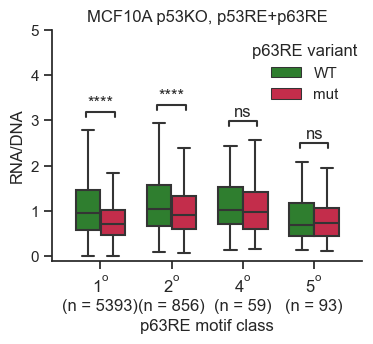

In [59]:
fig3E, ax = plt.subplots(figsize=(4,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p53.values(), ['WT','mut'])
df_both_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_both_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A p53KO, p53RE+p63RE',ylim=(-0.1,5))
annotator = Annotator(pairs = compare, data = df_both_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p53.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.6, 1))
#count number of enhancers and add to labels
counts = df_both_ko[df_both_ko.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig3E.savefig(os.path.join(fig_out_path,'3E_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.619e-05 U_stat=1.773e+06
$\mathregular{1^{o}}$ vs. $\mathregular{3^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.741e-30 U_stat=2.114e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.624e-03 U_stat=2.128e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.936e-01 U_stat=4.896e+05
$\mathregular{1^{o}}$ vs. $\mathregular{6^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.656e-01 U_stat=3.324e+05


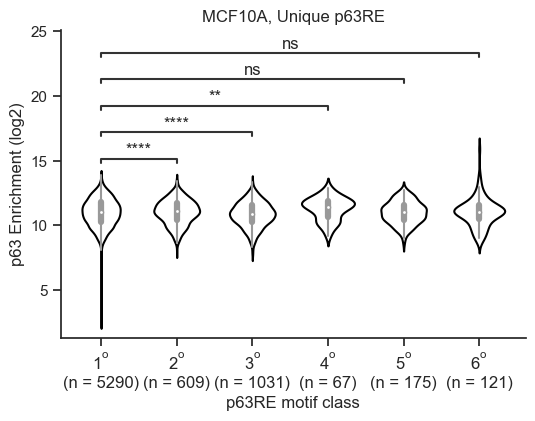

In [32]:
p63_enrh_uniq = df[(df.cell_line == 'MCF10A') & (df.p63RE_type  == 'Unique p63RE') & (df.enhancer_variant == 'WT')].merge(p63_chip, how='left', on=['loc','enhancer_variant'])

fig3G, ax = plt.subplots(figsize=(6,4))
sns.violinplot(data = p63_enrh_uniq, x = 'class_labels',y = 'p63_enh_log2', order=change_p63.values(),
			   width=0.7, color= 'white',  ax = ax).set(title = 'MCF10A, Unique p63RE',
				xlabel='p63RE motif class',ylabel='p63 Enrichment (log2)')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{3^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{6^{o}}$')]
annotator = Annotator(pairs = compare, data = p63_enrh_uniq, x = 'class_labels',y = 'gc', order=change_p63.values(), ax = ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
counts = p63_enrh_uniq[p63_enrh_uniq.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig3G.savefig(os.path.join(fig_out_path,'3G_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:6.633e-07 Stat=7.128e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:3.347e-37 Stat=5.582e+06
$\mathregular{3^{o}}$_WT vs. $\mathregular{3^{o}}$_mut: Wilcoxon test (paired samples), P_val:3.243e-12 Stat=1.994e+05
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.101e-02 Stat=7.320e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:6.919e-01 Stat=7.434e+03
$\mathregular{6^{o}}$_WT vs. $\mathregular{6^{o}}$_mut: Wilcoxon test (paired samples), P_val:5.221e-01 Stat=3.443e+03


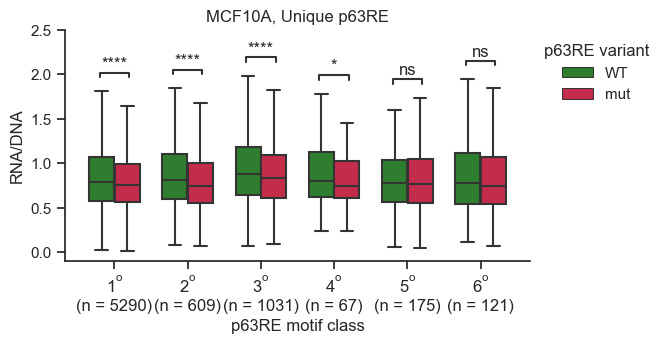

In [35]:
fig3H, ax = plt.subplots(figsize=(6,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p63.values(), ['WT','mut'])
df_p63 = df[(df.cell_line == 'MCF10A') & (df.p63RE_type == 'Unique p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_p63, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A, Unique p63RE',ylim=(-0.1,2.5))
annotator = Annotator(pairs = compare, data = df_p63, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_p63[df_p63.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig3H.savefig(os.path.join(fig_out_path,'3H_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{2^{o}}$_WT vs. $\mathregular{2^{o}}$_mut: Wilcoxon test (paired samples), P_val:6.673e-07 Stat=7.128e+04
$\mathregular{1^{o}}$_WT vs. $\mathregular{1^{o}}$_mut: Wilcoxon test (paired samples), P_val:4.791e-66 Stat=5.090e+06
$\mathregular{3^{o}}$_WT vs. $\mathregular{3^{o}}$_mut: Wilcoxon test (paired samples), P_val:5.913e-15 Stat=1.913e+05
$\mathregular{4^{o}}$_WT vs. $\mathregular{4^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.075e-04 Stat=5.190e+02
$\mathregular{5^{o}}$_WT vs. $\mathregular{5^{o}}$_mut: Wilcoxon test (paired samples), P_val:1.438e-01 Stat=6.719e+03
$\mathregular{6^{o}}$_WT vs. $\mathregular{6^{o}}$_mut: Wilcoxon test (paired samples), P_val:4.234e-01 Stat=3.381e+03


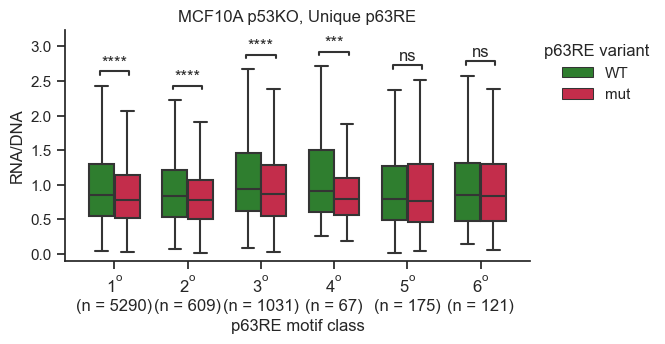

In [36]:
fig3I, ax = plt.subplots(figsize=(6,3))
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = stats_comp_pair(change_p63.values(), ['WT','mut'])
df_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.p63RE_type == 'Unique p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), width=0.7, palette = cols,
			showfliers = False, ax=ax).set(xlabel='p63RE motif class', title='MCF10A p53KO, Unique p63RE',ylim=(-0.1,2.55))
annotator = Annotator(pairs = compare, data = df_ko, x = 'class_labels',y = 'RNA/DNA',hue = 'enhancer_variant', order=change_p63.values(), ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_ko[df_ko.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig3I.savefig(os.path.join(fig_out_path,'3I_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

### Process sequences to calculate dinucelotide frequency for these enhancers

In [48]:
#calculate dinucelotide frequency
import warnings
warnings.filterwarnings('ignore')
#create all possible dinucleotide combinations
dinucleotides = []
for n in ['A','T','G','C']:
	for u in ['A','T','G','C']:
		dinucleotides.append(n + u)
#import and process tables that have enh id and seq
df_ko = df[(df.enhancer_variant == 'WT') & (df.cell_line == 'MCF10A p53KO')]
df_seqs = pd.read_csv('p63enh_starrseq_info_long.csv', usecols=['seq','loc', 'enhancer_variant'])
df_seqs = df_seqs[df_seqs.enhancer_variant == 'WT']
df_ko = df_ko.merge(df_seqs, how='left', on='loc')
df_ko.seq = df_ko.seq.str.upper()
def count_dint(seq):
	d = {}
	for dint in dinucleotides:
		d.update({dint: seq.count(dint)})
	return d
df_ko[dinucleotides] = df_ko.apply(lambda row: count_dint(row.seq), axis=1, result_type="expand")
df_freq = df_ko.copy()
df_freq['len/2'] = df_freq.seq.apply(lambda x: len(x)/2)
df_freq[dinucleotides] = df_freq[dinucleotides].div(df_freq['len/2'].values, axis='index')
long = df_freq.melt(id_vars = ['p63RE_type', 'loc'], value_vars = dinucleotides, var_name = 'dinucleotide', value_name = 'frequency')
type_palette = {'Unique p63RE': sns.color_palette('flare')[-2], 'p53RE+p63RE':sns.color_palette('gnuplot')[-1]}
long

,p63RE_type,loc,dinucleotide,frequency
0,Unique p63RE,chr1_3717092_3717116,AA,0.116667
1,Unique p63RE,chr1_31575754_31575773,AA,0.100840
2,p53RE+p63RE,chr1_38117813_38117832,AA,0.067227
3,p53RE+p63RE,chr1_40886808_40886827,AA,0.050420
4,Unique p63RE,chr1_42941183_42941207,AA,0.066667
...,...,...,...,...
219099,Unique p63RE,chr9_132993510_132993534,CC,0.083333
219100,p53RE+p63RE,chr9_135016437_135016456,CC,0.117647
219101,Unique p63RE,chr9_136533879_136533893,CC,0.150000
219102,Unique p63RE,chr9_137062571_137062595,CC,0.100000


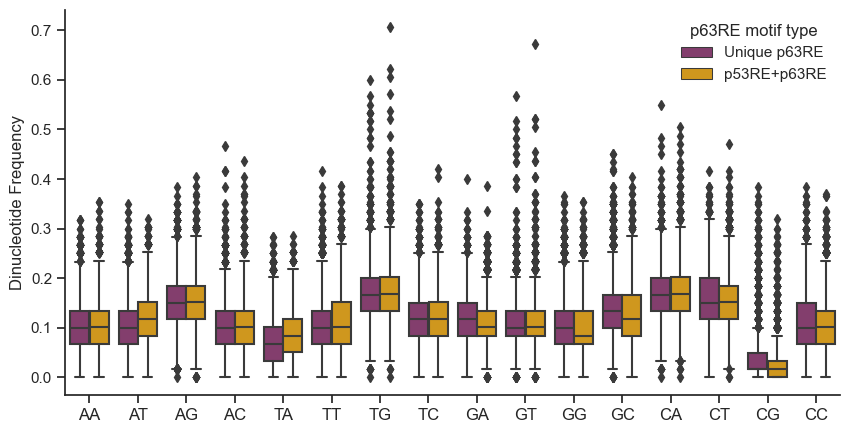

In [50]:
fig3J, ax =  plt.subplots(figsize=(10,5))
sns.boxplot(data=long, x='dinucleotide', y='frequency', hue='p63RE_type',palette=type_palette,ax = ax).set(ylabel='Dinucleotide Frequency', xlabel=None)
sns.move_legend(ax, "upper right", frameon=False, title = 'p63RE motif type')
fig3J.savefig(os.path.join(fig_out_path,'3J_20240430.eps'), dpi=300, transparent=True, bbox_inches='tight')

### Show GC skew across the enhancer region

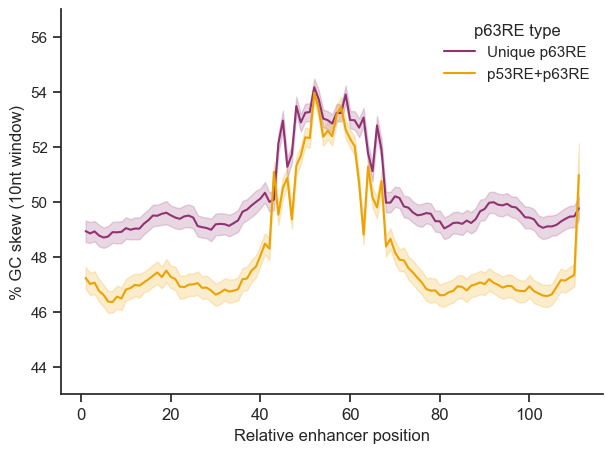

In [61]:
#draw GC skew accross enhacner
gc = pd.read_csv('p63enh_starrseq_gcskew_matched_MCF10Ap53KO.csv', index_col=0)
fig3K, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=gc, x='position', y='GC_skew', hue='p63RE_type',ax=ax, palette=type_palette).set(ylabel = '% GC skew (10nt window)', xlabel = 'Relative enhancer position', ylim=(43, 57))
sns.move_legend(ax, "upper right", frameon=False, title = 'p63RE type')
fig3K.savefig(os.path.join(fig_out_path,'3K_20240430.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.619e-05 U_stat=1.773e+06
$\mathregular{1^{o}}$ vs. $\mathregular{3^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.741e-30 U_stat=2.114e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.624e-03 U_stat=2.128e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.936e-01 U_stat=4.896e+05
$\mathregular{1^{o}}$ vs. $\mathregular{6^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.656e-01 U_stat=3.324e+05


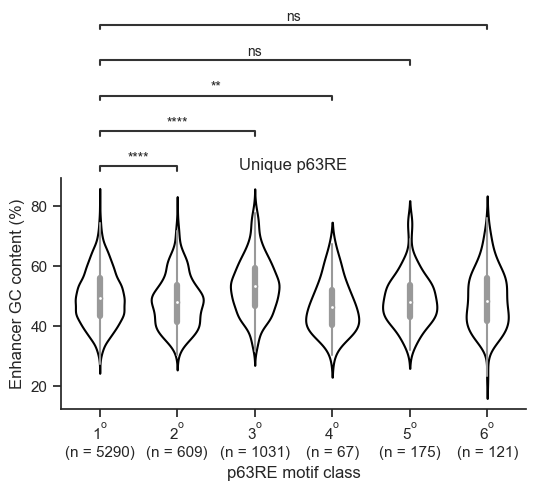

In [4]:
df_mcf_wt_p63 = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT') & (df.p63RE_type != 'p53RE+p63RE')]
fig3L, ax = plt.subplots(figsize=(6,3))
sns.violinplot(data = df_mcf_wt_p63, x = 'class_labels',y = 'gc', order=change_p63.values(), width=0.7, color= 'white',
			   ax = ax).set(title = 'Unique p63RE',xlabel='p63RE motif class',ylabel='Enhancer GC content (%)')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{3^{o}}$'),
		   ('$\mathregular{1^{o}}$', '$\mathregular{6^{o}}$')]
annotator = Annotator(pairs = compare, data = df_mcf_wt_p63, x = 'class_labels',y = 'gc', order=change_p63.values(), ax = ax)
annotator.configure(test = "Mann-Whitney", loc='outside').apply_and_annotate()
counts = df_mcf_wt_p63[df_mcf_wt_p63.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p63.values()])
fig3L.savefig(os.path.join(fig_out_path,'3L_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$\mathregular{1^{o}}$ vs. $\mathregular{2^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:7.862e-85 U_stat=1.352e+06
$\mathregular{1^{o}}$ vs. $\mathregular{4^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:1.449e-05 U_stat=1.070e+05
$\mathregular{1^{o}}$ vs. $\mathregular{5^{o}}$: Mann-Whitney-Wilcoxon test two-sided, P_val:8.445e-01 U_stat=2.537e+05


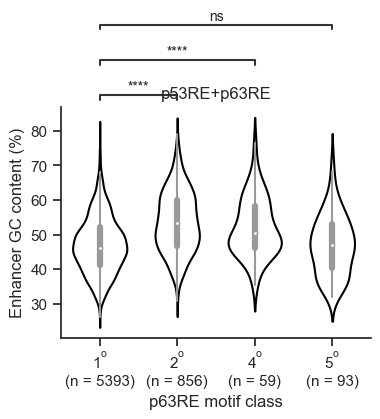

In [6]:
df_mcf_wt_p53 = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT') & (df.p63RE_type == 'p53RE+p63RE')]
fig3M, ax = plt.subplots(figsize=(4,3))
sns.violinplot(data = df_mcf_wt_p53, x = 'class_labels',y = 'gc', order=change_p53.values(), width=0.7, color= 'white',  ax = ax).set(title = 'p53RE+p63RE', ylabel = 'Enhancer GC content (%)',xlabel='p63RE motif class')
patch_violinplot() #matplotlib bug fix
compare = [('$\mathregular{1^{o}}$', '$\mathregular{2^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{4^{o}}$'), ('$\mathregular{1^{o}}$', '$\mathregular{5^{o}}$')]
annotator = Annotator(pairs = compare, data = df_mcf_wt_p53, x = 'class_labels',y = 'gc', order=change_p53.values(), ax = ax)
annotator.configure(test = "Mann-Whitney", loc='outside').apply_and_annotate()
counts = df_mcf_wt_p53[df_mcf_wt_p53.enhancer_variant == 'WT'].value_counts(subset='class_labels').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in change_p53.values()])
fig3M.savefig(os.path.join(fig_out_path,'3M_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')